# Analisis Exploratorio

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Luego de la limpieza de datos se hace un analisis exploratorio sobre los dataframes recurriendo a herramientas estadísticas y de visualización y  combinando dichas herramientas comenzaremos a extraer información adicional que pueda dar respuesta a nuestro problema.

## Relación Fecha - Número de accidentes

Verificamos si existen fechas puntuales en las que existan mas ocurrencias de accidentes para poder preveer los mismos encontrando soluciones a futuro

In [3]:
combined_data = pd.read_csv('./Datasets/Data_Combinada.csv')
combined_data.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10444\2582469843.py:1: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_data = pd.read_csv('./Datasets/Data_Combinada.csv')


,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2022S000001,01/01/2022,1:30:00,"AVDA. ALBUFERA, 19",19,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Conductor,De 30 a 34 años,Mujer,NaN,NaN,"443359,226","4472082,272",0.0,0.0
1,2022S000001,01/01/2022,1:30:00,"AVDA. ALBUFERA, 19",19,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Conductor,De 45 a 49 años,Hombre,NaN,NaN,"443359,226","4472082,272",0.0,0.0
2,2022S000002,01/01/2022,0:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3.0,RETIRO,Colisión fronto-lateral,NaN,Motocicleta hasta 125cc,Conductor,De 30 a 34 años,Hombre,NaN,NaN,"441155,351","4474129,588",1.0,0.0
3,2022S000002,01/01/2022,0:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3.0,RETIRO,Colisión fronto-lateral,NaN,Motocicleta hasta 125cc,Pasajero,De 35 a 39 años,Mujer,NaN,NaN,"441155,351","4474129,588",0.0,0.0
4,2022S000002,01/01/2022,0:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3.0,RETIRO,Colisión fronto-lateral,NaN,Turismo,Conductor,De 40 a 44 años,Hombre,NaN,NaN,"441155,351","4474129,588",0.0,0.0


In [4]:
#Crear el df date_ocurrency para saber las ocurrencias por fecha
date_ocurrency = combined_data.groupby('fecha').size().reset_index(name='ocurrencia')
date_ocurrency.sort_values(by='ocurrencia', ascending=False, inplace = True)
date_ocurrency.head()

,fecha,ocurrencia
358,18/11/2022,207
319,16/12/2022,207
142,08/02/2022,206
25,02/03/2023,205
465,24/03/2023,202


Creamos un gráfico de lineas de las ocurrencias agrupadas por mes del año para facilitar la visualizacion de los datos y sacar conclusiones a traves de este

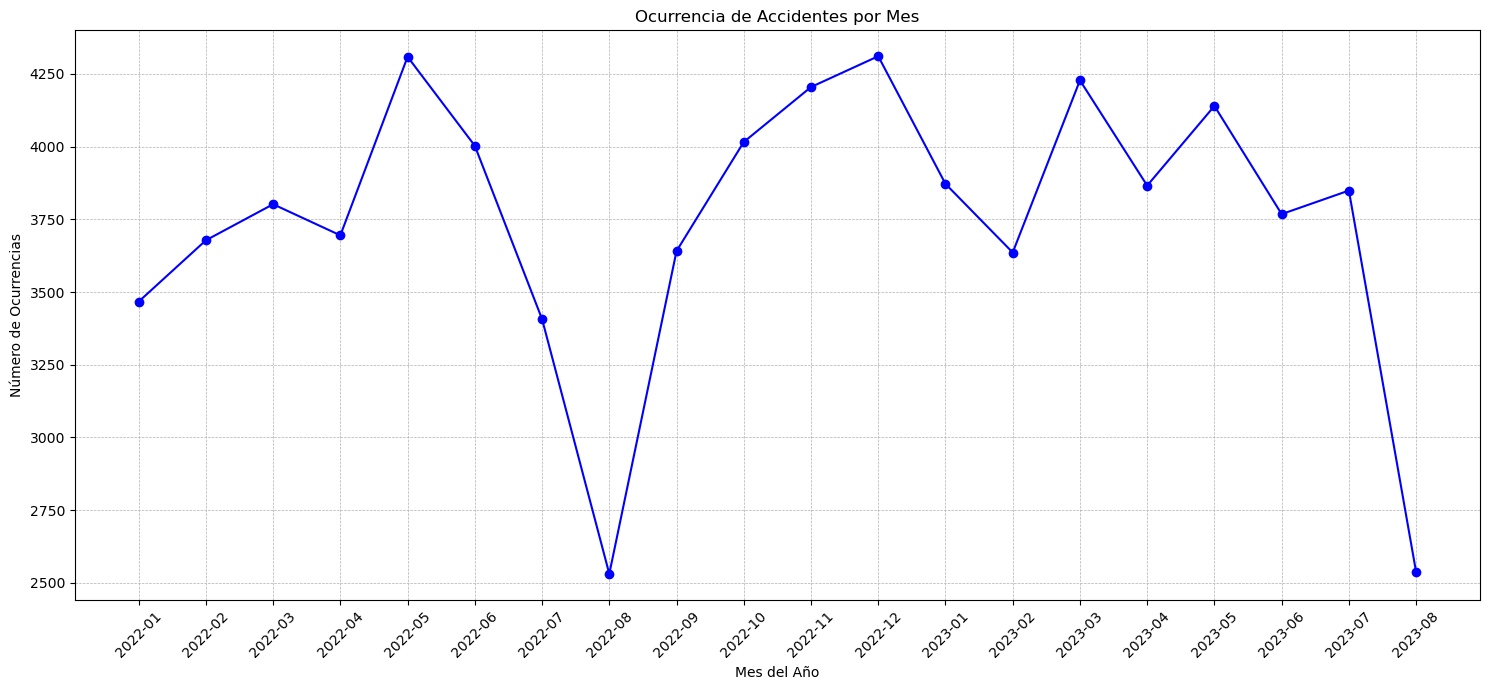

In [5]:
# Ordenar el DataFrame por fecha de forma ascendente
date_ocurrency['fecha'] = pd.to_datetime(date_ocurrency['fecha'], format='%d/%m/%Y')
date_ocurrency.sort_values(by='fecha', ascending=True, inplace=True)

# Agrupar por meses del año
date_ocurrency['year_month'] = date_ocurrency['fecha'].dt.strftime('%Y-%m')
monthly_ocurrency = date_ocurrency.groupby('year_month').sum()['ocurrencia'].reset_index()

# Generar el gráfico de líneas agrupado por meses
plt.figure(figsize=(15, 7))
plt.plot(monthly_ocurrency['year_month'], monthly_ocurrency['ocurrencia'], marker='o', linestyle='-', color='b')
plt.title('Ocurrencia de Accidentes por Mes')
plt.xlabel('Mes del Año')
plt.ylabel('Número de Ocurrencias')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

El gráfico muestra una fluctuación en la ocurrencia de accidentes mes a mes, con ciertos periodos evidenciando picos elevados. Esta variabilidad puede estar influenciada por una serie de factores, como condiciones climáticas, festividades, o eventos locales. Distinguir los meses con alta ocurrencia de accidentes es crucial para tomar medidas preventivas y mejorar la seguridad vial.

Entender las tendencias y patrones en este gráfico nos va a permitir anticipar y prepararnos mejor para futuros escenarios. Al cruzar estos datos con otros factores relevantes, se podrían identificar causas específicas detrás de los incrementos y descensos en las ocurrencias y, por lo tanto, desarrollar soluciones más efectivas.

## Siguiendo con el análisis exploratorio contamos por distrito la cantidad de ocurrencias por mes y año

In [6]:
# Extrayendo año y mes de la columna 'fecha' y creando una nueva columna 'year_month' sin modificar el dataframe original
year_month = pd.to_datetime(combined_data['fecha'], dayfirst=True).dt.to_period('M')

# Agrupando por 'year_month' y 'distrito' para contar las ocurrencias
grouped_data = combined_data.groupby([year_month, 'distrito']).size().unstack().fillna(0)

grouped_data.head()

distrito,ARGANZUELA,BARAJAS,CARABANCHEL,CENTRO,CHAMARTÍN,CHAMBERÍ,CIUDAD LINEAL,FUENCARRAL-EL PARDO,HORTALEZA,LATINA,...,MORATALAZ,PUENTE DE VALLECAS,RETIRO,SALAMANCA,SAN BLAS-CANILLEJAS,TETUÁN,USERA,VICÁLVARO,VILLA DE VALLECAS,VILLAVERDE
fecha,,,,,,,,,,,,,,,,,,,,,
2022-01,128,65,212,151,203,178,234,186,144,181,...,85,303,151,299,198,143,184,54,61,137
2022-02,149,64,213,194,246,171,228,211,173,214,...,95,270,159,236,161,183,172,78,90,119
2022-03,200,60,236,201,266,178,259,213,136,164,...,97,294,170,299,224,146,164,55,101,123
2022-04,161,60,244,231,335,186,238,173,129,191,...,83,294,176,220,170,180,126,62,87,101
2022-05,186,83,218,221,391,246,295,225,180,201,...,125,344,188,312,240,148,176,65,111,120


Ahora que hemos agrupado los datos por year_month y distrito y contado las ocurrencias, podemos proceder a crear un gráfico de barras sobrepuestas que muestra la distribución de ocurrencias por distrito a lo largo de los meses por año y visualizar si existe alg.

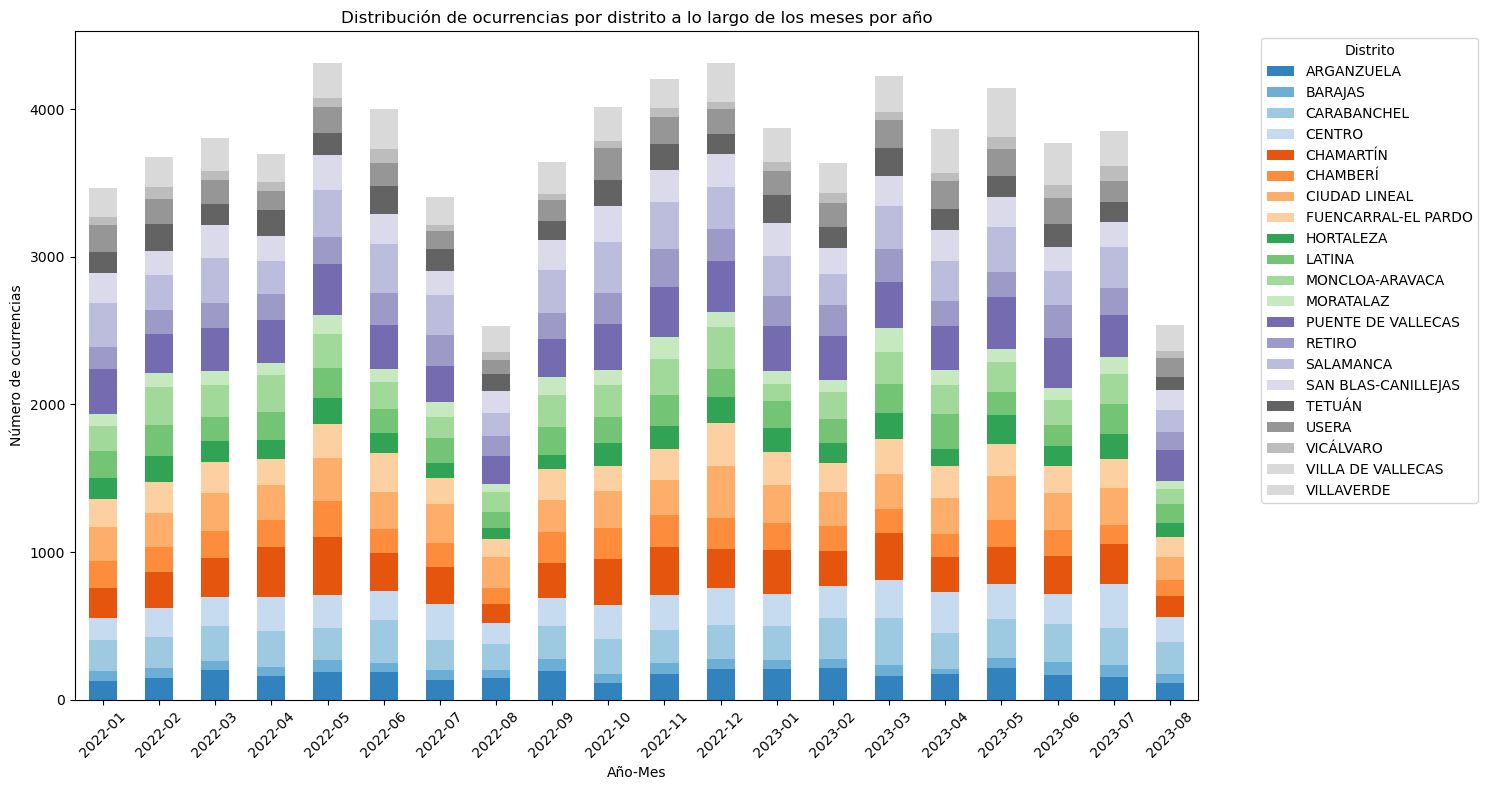

In [7]:
# Creando el gráfico de barras sobrepuestas
fig, ax = plt.subplots(figsize=(15, 8))


grouped_data.plot(kind='bar', stacked=True, ax=ax, colormap='tab20c')
plt.title('Distribución de ocurrencias por distrito a lo largo de los meses por año')
plt.ylabel('Número de ocurrencias')
plt.xlabel('Año-Mes')
plt.legend(title='Distrito', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotando las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Análisis del Gráfico de Barras por Distrito
* **Distribución de Ocurrencias**: Algunos distritos presentan una mayor cantidad de ocurrencias que otros. Esto podría indicar áreas con mayor tráfico vehicular o puntos críticos que requieren atención.
* **Variabilidad Temporal**: Existen variaciones mensuales en las ocurrencias por distrito que podrían estar influenciadas por factores estacionales como condiciones meteorológicas, períodos vacacionales, o eventos locales.
* **Picos y Valles**: Los picos específicos en ciertos distritos pueden sugerir eventos o cambios temporales en el tráfico, como obras en carreteras, mientras que los valles podrían indicar períodos de menor actividad, como pueden ser las restricciones de tráfico.

## Conclusión General Ocurrencias
Los dos gráficos proporcionan perspectivas valiosas sobre las ocurrencias de accidentes. El gráfico de líneas es útil para comprender la tendencia general y los patrones estacionales de los accidentes a nivel de toda la ciudad. En cambio, el gráfico de barras sobrepuestas destaca las diferencias entre los distritos y puede ser clave para las intervenciones y políticas locales más dirigidas. La combinación de ambos enfoques puede ayudar a las autoridades a diseñar estrategias de prevención de accidentes más efectivas, dirigidas tanto a áreas específicas como a la ciudad en general.

# Verificamos si afecta el numero de pasajeros en un choque
### De esta manera sabremos si podemos quitarnos los datos de los pasajeros

1. Contar el número de pasajeros por accidente para analizar la relación entre el número de pasajeros y otros factores, como el tipo de accidente o la lesividad.

In [8]:
pasajeros_por_accidente = combined_data[combined_data['tipo_persona'] == 'Pasajero'].groupby('num_expediente').size()

# Renombrar la serie para claridad
pasajeros_por_accidente = pasajeros_por_accidente.rename('numero_pasajeros')

# Mostrar las primeras filas de pasajeros_por_accidente
pasajeros_por_accidente.head()


num_expediente
2022S000002    1
2022S000004    1
2022S000005    1
2022S000011    2
2022S000012    4
Name: numero_pasajeros, dtype: int64

2.  fusionar nuestra serie pasajeros_por_accidente con el DataFrame combined_data para tener el número de pasajeros junto con los demás datos

In [9]:
# Fusionar pasajeros_por_accidente con combined_data
combined_data = combined_data.merge(pasajeros_por_accidente, how='left', on='num_expediente')

# Rellenar los valores NaN en la columna 'numero_pasajeros' con 0 (esto se debe a accidentes donde no hay pasajeros involucrados)
combined_data['numero_pasajeros'].fillna(0, inplace=True)

# Explorar la relación entre el número de pasajeros y el tipo de accidente
relacion_pasajeros_tipo = combined_data.groupby(['tipo_accidente', 'numero_pasajeros']).size().unstack().fillna(0)

# Mostrar la relación
relacion_pasajeros_tipo


numero_pasajeros,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,12.0,13.0,15.0,19.0
tipo_accidente,,,,,,,,,,,,,,
Alcance,9663.0,4253.0,2190.0,995.0,410.0,135.0,24.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0
Atropello a animal,137.0,13.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Atropello a persona,4398.0,681.0,135.0,43.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Caída,3416.0,719.0,154.0,24.0,43.0,40.0,7.0,9.0,0.0,21.0,0.0,0.0,0.0,0.0
Choque contra obstáculo fijo,6383.0,1236.0,388.0,167.0,49.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Colisión frontal,1147.0,418.0,232.0,84.0,46.0,7.0,8.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0
Colisión fronto-lateral,11114.0,4601.0,2150.0,844.0,425.0,119.0,42.0,27.0,0.0,11.0,14.0,0.0,17.0,21.0
Colisión lateral,7769.0,2239.0,904.0,341.0,102.0,72.0,8.0,9.0,10.0,0.0,0.0,0.0,0.0,0.0
Colisión múltiple,2271.0,1023.0,628.0,310.0,186.0,66.0,56.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0


Observamos que no tiene mucha relacion el tipo de accidente con el numero de pasajeros, más que la mayoría de los accidentes involucran vehículos sin pasajeros o con un número limitado de pasajeros.

## Verificamos con la gravedad del accidente (lesividad)

1. Calculamos la proporción de accidentes con distintos niveles de lesividad en función del número de pasajeros

In [10]:
proporcion_lesividad = combined_data.groupby(['numero_pasajeros', 'lesividad']).size().unstack().fillna(0)
proporcion_lesividad = proporcion_lesividad.div(proporcion_lesividad.sum(axis=1), axis=0)  # Convertir a proporciones

# Visualizar las proporciones
proporcion_lesividad

lesividad,Asistencia sanitaria ambulatoria con posterioridad,Asistencia sanitaria inmediata en centro de salud o mutua,Asistencia sanitaria sólo en el lugar del accidente,Atención en urgencias sin posterior ingreso,Fallecido 24 horas,Ingreso inferior o igual a 24 horas,Ingreso superior a 24 horas,Se desconoce,Sin asistencia sanitaria
numero_pasajeros,,,,,,,,,
0.0,0.025541,0.052796,0.248682,0.066467,0.001114,0.085194,0.025884,0.000043,0.494279
1.0,0.019559,0.031771,0.224775,0.047190,0.000517,0.066025,0.018214,0.000103,0.591845
2.0,0.018099,0.024284,0.228637,0.040092,0.001375,0.054525,0.014662,0.000000,0.618328
3.0,0.013242,0.019597,0.228814,0.027013,0.001589,0.052436,0.007945,0.000530,0.648835
4.0,0.016304,0.020652,0.233696,0.032609,0.000000,0.031522,0.004348,0.000000,0.660870
5.0,0.005698,0.022792,0.247863,0.076923,0.000000,0.037037,0.002849,0.000000,0.606838
6.0,0.000000,0.015504,0.302326,0.023256,0.000000,0.015504,0.000000,0.000000,0.643411
7.0,0.059701,0.000000,0.253731,0.029851,0.000000,0.059701,0.000000,0.000000,0.597015
8.0,0.000000,0.000000,0.476190,0.095238,0.000000,0.000000,0.000000,0.000000,0.428571


Observamos que en accidentes sin pasajeros o con un número limitado de pasajeros, la proporción de accidentes donde no se requiere asistencia sanitaria (columna "Sin asistencia sanitaria") tiende a ser más alta.

2. Para obtener una imagen más clara, podemos visualizar estos datos. Un gráfico de áreas apiladas será útil para visualizar la distribución de niveles de lesividad en función del número de pasajeros.

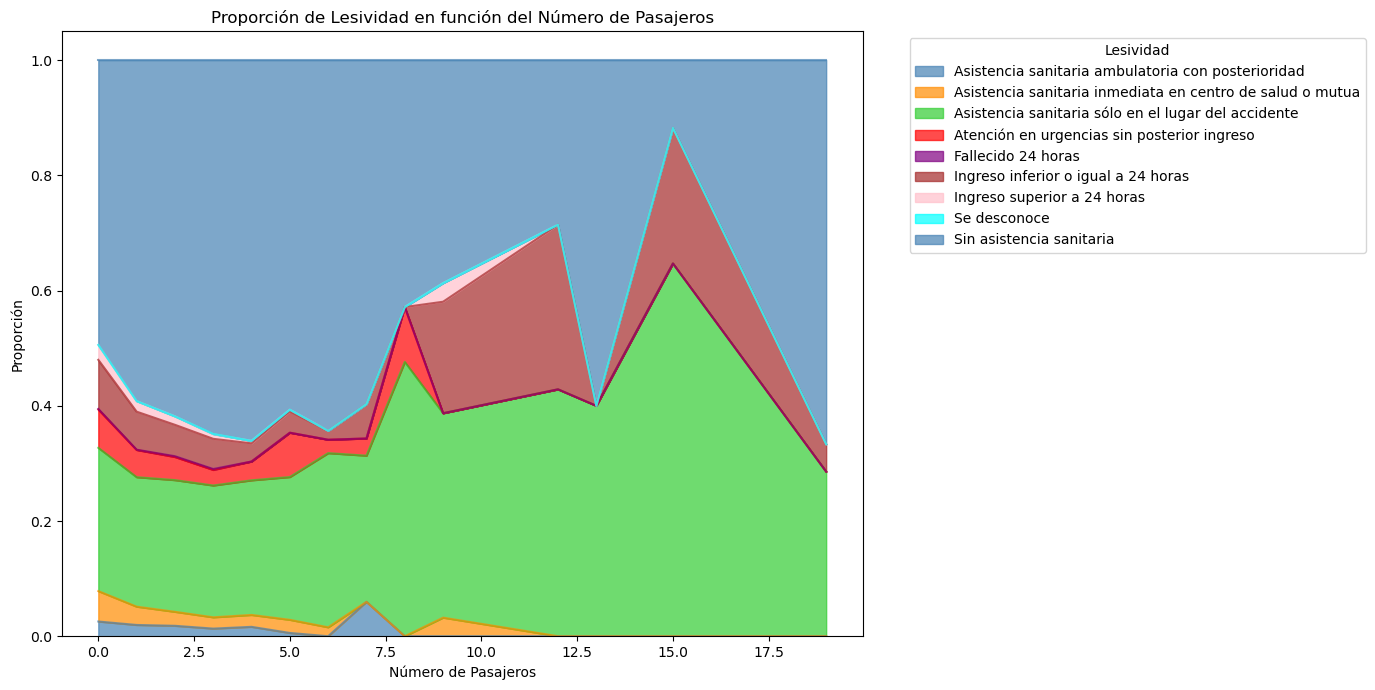

In [11]:
colors = ['steelblue', 'darkorange', 'limegreen', 'red', 'purple', 'brown', 'pink', 'cyan']

# Gráfico de barras apiladas
#proporcion_lesividad.plot(kind='bar', stacked=True, figsize=(14,7), color=colors)
#plt.title('Proporción de Lesividad en función del Número de Pasajeros')
#plt.xlabel('Número de Pasajeros')
#plt.ylabel('Proporción')
#plt.legend(title='Lesividad', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.tight_layout()
#plt.show()

# Gráfico de áreas apiladas
fig, ax = plt.subplots(figsize=(14,7))
proporcion_lesividad.plot(kind='area', stacked=True, ax=ax, color=colors, alpha=0.7)
ax.set_title('Proporción de Lesividad en función del Número de Pasajeros')
ax.set_xlabel('Número de Pasajeros')
ax.set_ylabel('Proporción')
ax.legend(title='Lesividad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Del Gráfico podemos sacar varias conclusiones:
1. La mayoría de los accidentes, independientemente del número de pasajeros, caen en la categoría "Sin asistencia sanitaria", lo que indica que estos accidentes no resultaron en lesiones que requirieran atención médica.
2. Para accidentes con un número más alto de pasajeros (por ejemplo, 12, 14 y 18 pasajeros), aunque el tamaño de la muestra es pequeño, parece haber una proporción mayor de accidentes en la categoría "Sin asistencia sanitaria" en comparación con los accidentes con menos pasajeros.
3. Las proporciones de otras categorías de lesividad varían, pero no se observa un patrón claro en relación con el número de pasajeros.
En general, basándonos en este análisis visual, no parece que el número de pasajeros tenga una influencia fuerte y clara en la gravedad del accidente, al menos en términos de lesividad.

# Eliminamos la columna numero_pasajeros

In [12]:
combined_data.drop(columns= 'numero_pasajeros', inplace = True)
combined_data.head()

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2022S000001,01/01/2022,1:30:00,"AVDA. ALBUFERA, 19",19,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Conductor,De 30 a 34 años,Mujer,NaN,NaN,"443359,226","4472082,272",0.0,0.0
1,2022S000001,01/01/2022,1:30:00,"AVDA. ALBUFERA, 19",19,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Conductor,De 45 a 49 años,Hombre,NaN,NaN,"443359,226","4472082,272",0.0,0.0
2,2022S000002,01/01/2022,0:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3.0,RETIRO,Colisión fronto-lateral,NaN,Motocicleta hasta 125cc,Conductor,De 30 a 34 años,Hombre,NaN,NaN,"441155,351","4474129,588",1.0,0.0
3,2022S000002,01/01/2022,0:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3.0,RETIRO,Colisión fronto-lateral,NaN,Motocicleta hasta 125cc,Pasajero,De 35 a 39 años,Mujer,NaN,NaN,"441155,351","4474129,588",0.0,0.0
4,2022S000002,01/01/2022,0:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3.0,RETIRO,Colisión fronto-lateral,NaN,Turismo,Conductor,De 40 a 44 años,Hombre,NaN,NaN,"441155,351","4474129,588",0.0,0.0


# Buscamos el estado meteorológico por fecha y hora para reemplazar los valores nulos de esta columna

Iniciamos verificando los tipos de datos que hay en la columna estado meteorológico para saber los valores a reemplazar

In [13]:
combined_data['estado_meteorológico'].value_counts()

Despejado         56670
Nublado            4653
Lluvia débil       3984
LLuvia intensa      957
Se desconoce        459
Granizando           13
Nevando               6
Name: estado_meteorológico, dtype: int64

Cuando el valor sea desconocido los convertimos a nulo para reemplazarlos con los nulos, ya que esto no nos aporta información adicional

In [20]:
combined_data.loc[combined_data['estado_meteorológico'] == 'Se desconoce'] = None
combined_data['estado_meteorológico'].value_counts()

Despejado         56670
Nublado            4653
Lluvia débil       3984
LLuvia intensa      957
Granizando           13
Nevando               6
Name: estado_meteorológico, dtype: int64

In [26]:
weather_data_sep23 = pd.read_csv('./Datasets/sep_meteo23.csv', sep = ';')
weather_data_sep23.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,102,81,28079102_81_98,2023,9,1,1.23,V,...,2.37,V,2.18,V,1.45,V,0.57,V,0.72,V
1,28,79,102,81,28079102_81_98,2023,9,2,0.65,V,...,3.53,V,3.28,V,3.48,V,2.42,V,1.92,V
2,28,79,102,81,28079102_81_98,2023,9,3,1.77,V,...,3.47,V,3.53,V,3.27,V,5.03,V,3.58,V
3,28,79,102,81,28079102_81_98,2023,9,4,2.13,V,...,1.03,V,1.25,V,1.52,V,1.08,V,1.87,V
4,28,79,102,81,28079102_81_98,2023,9,5,1.42,V,...,0.83,V,0.35,V,0.53,V,0.83,V,1.15,V


Limpiamos las filas duplicadas o filas completamente nulas las eliminamos para evitar tener datos repetidos

In [27]:
weather_data_sep23.drop_duplicates(inplace=True)
weather_data_sep23.dropna(how='all', inplace=True)
weather_data_sep23.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,102,81,28079102_81_98,2023,9,1,1.23,V,...,2.37,V,2.18,V,1.45,V,0.57,V,0.72,V
1,28,79,102,81,28079102_81_98,2023,9,2,0.65,V,...,3.53,V,3.28,V,3.48,V,2.42,V,1.92,V
2,28,79,102,81,28079102_81_98,2023,9,3,1.77,V,...,3.47,V,3.53,V,3.27,V,5.03,V,3.58,V
3,28,79,102,81,28079102_81_98,2023,9,4,2.13,V,...,1.03,V,1.25,V,1.52,V,1.08,V,1.87,V
4,28,79,102,81,28079102_81_98,2023,9,5,1.42,V,...,0.83,V,0.35,V,0.53,V,0.83,V,1.15,V


### Eliminamos las filas que no nos ayuden a saber el estado

Eliminamos las siguientes columnas:
 1. **Provincia, Municipio y Punto Muestreo**, ya que no nos vamos a especificar tan detalladamente la localizacion
2. **Punto Muestreo**,

In [39]:
weather_data_sep23.drop(columns = ['PROVINCIA', 'MUNICIPIO'])
# Crear una lista con los nombres de las columnas desde V01 hasta V24
columns_to_check = [f'V{i:02d}' for i in range(1, 25)]

# Crear una máscara donde True indica las filas que tienen 'N' en cualquiera de las columnas seleccionadas
mask_any_n = weather_data_sep23[columns_to_check].eq('N').any(axis=1)

# Invertir la máscara para seleccionar las filas que no tienen 'N' en ninguna de las columnas seleccionadas
mask_not_any_n = ~mask_any_n

# Filtrar el DataFrame para excluir las filas donde alguna de las columnas de V01 a V24 es 'N'
weather_data_filtered = weather_data_sep23[mask_not_any_n]


weather_data_sep23['V01'].value_counts()

V    2742
N      27
Name: V01, dtype: int64

In [ ]:
mask_unwanted = weather_data_sep23['estado_meteorológico'] == 'Se desconoce'
weather_data_sep23.drop()